In [4]:
import os

os.environ[
    "OMP_NUM_THREADS"
] = "64"  # for jupyter.nersc.gov otherwise the notebook only uses 2 cores

import seaborn as sns

sns.set_context("talk")
# sns.set()
sns.set_style("ticks")

import matplotlib as mpl
mpl.rc('image', cmap='coolwarm')

import matplotlib.pyplot as plt

%matplotlib inline

from os.path import join as opj

import healpy as hp
import numpy as np

from lenspyx import synfast
from lenspyx.utils import camb_clfile

import plancklens
from plancklens import utils

In [5]:
from utility import bin_cell

In [6]:
import time
from tqdm import tqdm

In [7]:
import lensre
from importlib import reload
reload(lensre)
from lensre import run_qe

Using lenspyx alm2map


In [8]:
import utility
reload(utility)
from utility import plot_errors_from_mf, w

In [9]:
import pymaster as nmt

In [10]:
cls_path = '/global/homes/j/jianyao/non_gau_lensing/theory/cls/'

In [11]:
cl_unl = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lenspotentialCls.dat'))
cl_len = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lensedCls.dat'))
#: Fiducial unlensed and lensed power spectra used for the analysis.

cl_weight = utils.camb_clfile(os.path.join(cls_path, 'FFP10_wdipole_lensedCls.dat'))
cl_weight['bb'] *= 0.
#: CMB spectra entering the QE weights (the spectra multplying the inverse-variance filtered maps in the QE legs) 

In [12]:
from binning import binning, multipole_binning

In [13]:
ell = np.arange(2, 1000)
ell_all = np.arange(1000)

binner = multipole_binning(n = 30,lmin=2,lmax=998,spc='p2')
cl_binned = binning(cl_unl['pp'][ell_all]*w(ell_all),binner)

# estimate N1 from 100 realizations, with phi fixed

In [ ]:
# to estimate the
cases = ['no_fore'] #, 'd9', 'forse3_Gaussiand9', 'forse3_d9'

lmin_ivf = 100
lmax_ivf=2000
qe_keys = ['p_eb']
lmax_Bmode= 2000
results_all_2000 = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = 100, lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment='S4_LAT_N1')

run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_N1_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000
jit: instantiating ctype = <class 'plancklens.qcinv.multigrid.multigrid_chain'>
creating split preconditioner  ('dense(/pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_N1_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000/cinv_t/dense.pk)', '64', 'diag_cl')
creating dense preconditioner. (nside = 128, lmax = 64, cache = /pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_N1_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000/cinv_t/dense.pk)
jit: instantiating ctype = <class 'plancklens.qcinv.opfilt_tt.alm_filter_ninv'>
opfilt_tt: inverse noise map std dev / av = 1.234e-01
 [00:00:00] filling template (4) projection matrix -------> 75%
ninv_ftl: using 25.43 uK-amin noise Cl
DEGRADING WITH NO MARGE MAPS
opfilt_tt: inverse noise map std dev / av = 1.275e-01
 [00:00:00] filling template (4) projection matrix ------

# ordinary run_qe

In [ ]:
cases = ['no_fore'] #, 'd9', 'forse3_Gaussiand9', 'forse3_d9'

lmin_ivf = 100
lmax_ivf=2000
qe_keys = ['p_eb']
lmax_Bmode= 2000
results_all_2000 = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = 500, lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment='S4_LAT')

# errors for each foreground case

In [63]:
# cases = ['no_fore', 'd9', 'forse3_Gaussiand9', 'forse3_d9']
cases = ['no_fore', 'forse3_d9']
lmin_ivf = 100
lmax_ivf=2000
qe_keys = ['p_eb']
lmax_Bmode= 2000
experiment = 'S4_LAT'
results_all_2000 = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = [200, 500], lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment=experiment)

run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [00:13<00:00, 22.48it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_cinv/cleaned_cmb_forse3_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [00:13<00:00, 22.34it/s]


In [10]:
# # cases = ['no_fore', 'd9', 'forse3_Gaussiand9', 'forse3_d9']
# cases = ['d9']
# lmin_ivf = 100
# lmax_ivf=2000
# qe_keys = ['p_eb']
# lmax_Bmode= 2000
# experiment = 'S4_LAT'
# results_d9 = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = [200, 500], lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment=experiment)

In [14]:
# plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, plot_mf_cl=True)

## toshiyan binning

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_cinv/


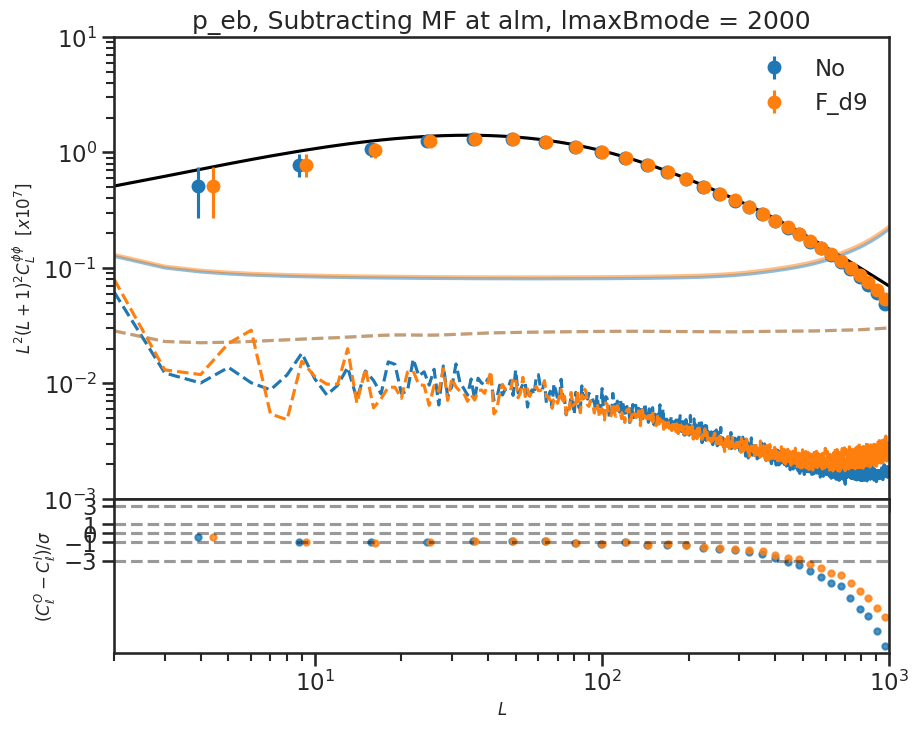

In [57]:
plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = experiment, subtract_mf= 'alm', from_fg_res = False, 
                                 plot_mf_cl=True, return_error=False, binning = ['toshiyan', binning, binner], true_binned=cl_binned)

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_cinv/


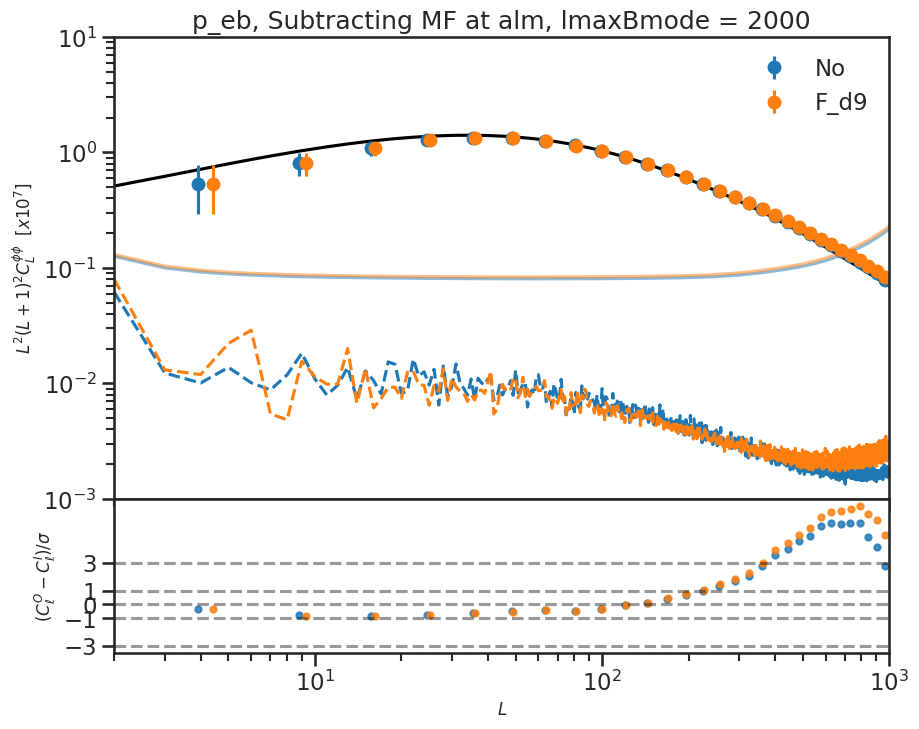

In [29]:
data_error = plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = experiment, subtract_mf= 'alm', from_fg_res = False, 
                                 plot_mf_cl=True, return_error=True, binning = ['toshiyan', binning, binner], true_binned=cl_binned)

# errors for model mismatch 

run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:15<00:00,  3.98it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:14<00:00,  4.01it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_forse3_Gaussiand9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:15<00:00,  3.96it/s]


run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/cleaned_cmb_forse3_d9_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [01:19<00:00,  3.79it/s]


plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/SO_LAT_MASK_cinv/


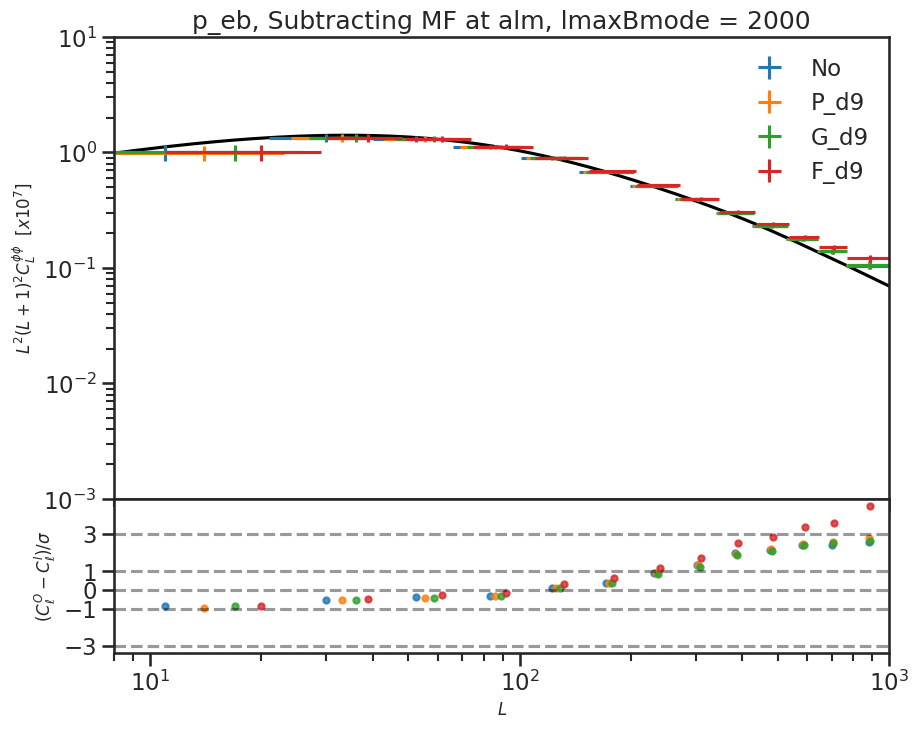

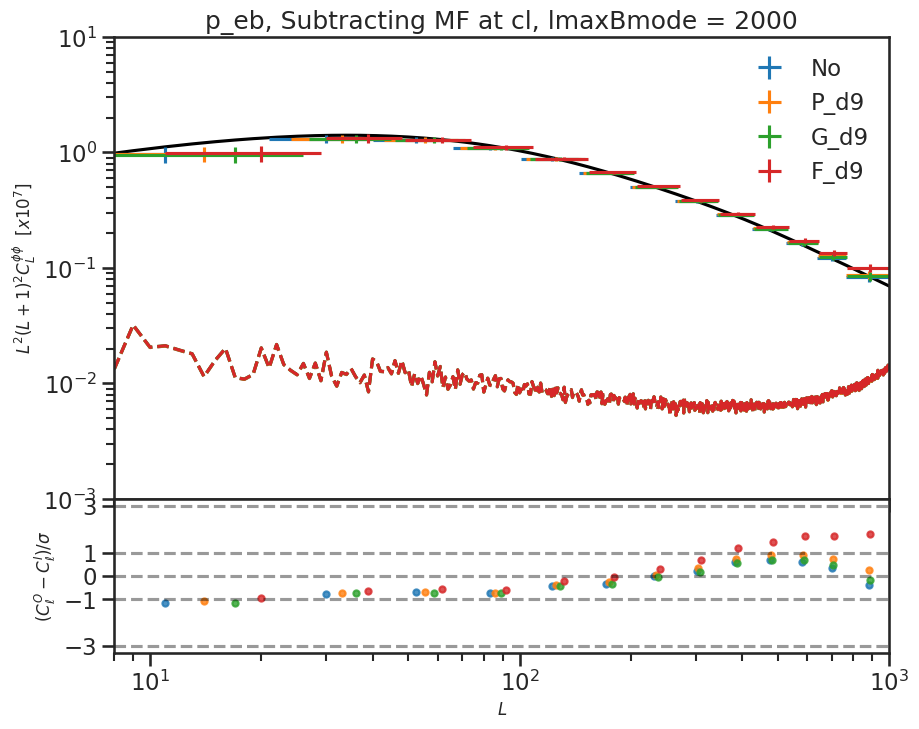

In [8]:
cases = ['no_fore', 'd9', 'forse3_Gaussiand9', 'forse3_d9']

lmin_ivf = 100
lmax_ivf=2000
qe_keys = ['p_eb']
lmax_Bmode= 2000
results_all_2000 = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = [200, 500], lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment='SO_LAT_MASK')
plot_errors_from_mf(cases, results_all_2000, lmax_Bmode, qe_key = qe_keys[0], experiment = 'SO_LAT_MASK', from_fg_res = False, plot_mf_cl=True, add_foreground='d9')

In [9]:
mfs = np.loadtxt('mean_filed_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000.dat', skiprows=1)

Text(0, 0.5, 'ratio to no_fore')

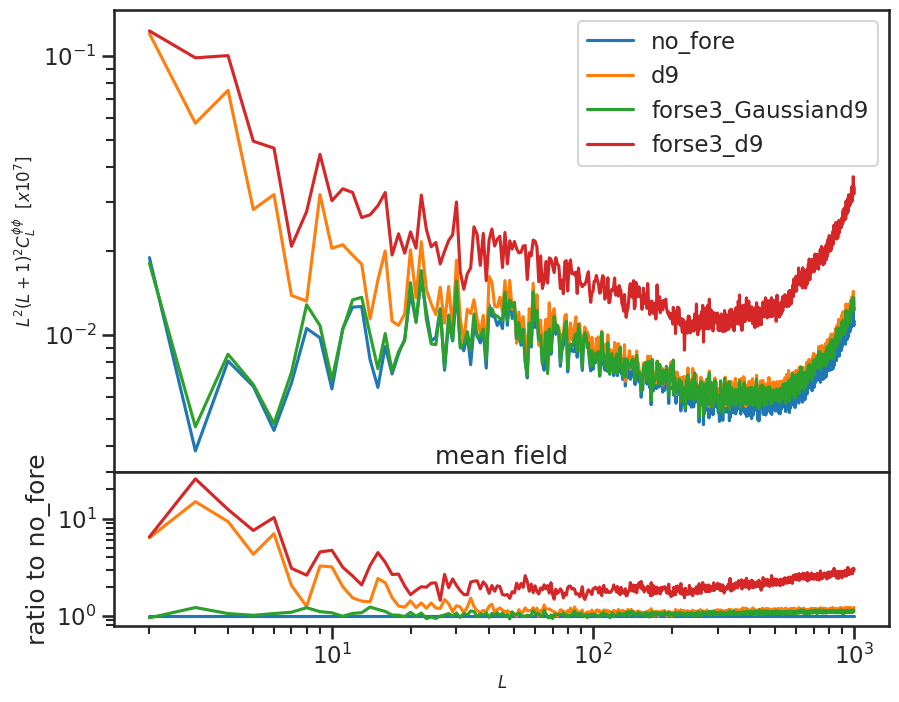

In [26]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize = (10, 8),  gridspec_kw={'height_ratios':[3,1]})
plt.title('mean field')
for i in range(1, 5):
    axes[0].loglog(mfs[:, 0], mfs[:, i], label = cases[i-1])
axes[0].legend()
axes[0].set_ylabel('$L^2 (L + 1)^2 C_L^{\phi\phi}$  [$x10^7$]', fontsize=12)
axes[1].set_xlabel('$L$', fontsize=12)
fig.subplots_adjust(hspace=0)
for i in range(1, 5):
    axes[1].loglog(mfs[:, 0], mfs[:, i]/mfs[:, 1], label = cases[i-1])
    
axes[1].set_ylabel('ratio to no_fore')

# test for No_fore

## test for MCN0

In [10]:
import plancklens
from plancklens.filt import filt_simple, filt_util, filt_cinv
from plancklens import utils
from plancklens import qest, qecl, qresp
from plancklens import nhl
from plancklens.n1 import n1
from plancklens.sims import planck2018_sims, phas, maps, utils as maps_utils

from plancklens.utils import clhash, hash_check
import os

import time
from tqdm import tqdm

import numpy as np
import healpy as hp

from lensre import cmb_len, cmb_noise

In [171]:
class parfile_gene:
    def __init__(self, qresp_dd, qcls_dd):
        self.qresp_dd = qresp_dd
        self.qcls_dd = qcls_dd        

In [11]:
qe_keys = ['p_eb']
cases = ['no_fore']
nside = 1024
lmin_ivf = 100
lmax_ivf = 2000
lmax_qlm = 1000
nsim = 1
lmax_Bmode = 2000
from_fg_res = False
which_fg = None          
experiment = 'S4_LAT'

In [3]:
# x_eb and p_eb results are saved simultaneously at the same time
qe_keys_dir = [qe_key.replace('x_', 'p_') if qe_key.startswith('x_') else qe_key for qe_key in qe_keys]

transf = np.ones(lmax_ivf + 1)
nlev_t = 0; #2.16
nlev_p = 0; #2.16

mask = '/pscratch/sd/j/jianyao/data_lensing/%s_mask_1024.fits'%experiment
    
for add_foreground in cases:

    qnorms = []; nhl_datas = []; qlms = []  
    qlms_fg = []; nhl_datas_fg = []

    dir_cleaned_cmb = '/pscratch/sd/j/jianyao/data_lensing/simulations/cleaned_CMB/%s_MASK/'%experiment # SO_LAT/S4_M

    if add_foreground == 'no_fore':
        inv_with_mask = dir_cleaned_cmb + 'Inverse_noise_variance_map_mask_zeros_%s.npy'%'d9' # no foreground cases uses residual noise of pysm_d9 case
    else:
        inv_with_mask = dir_cleaned_cmb + 'Inverse_noise_variance_map_mask_zeros_%s.npy'%add_foreground

    ninv_t = [np.load(inv_with_mask)[0]] + [mask]
    ninv_Q = [[np.load(inv_with_mask)[1]] + [mask]]         

    TEMP = '/pscratch/sd/j/jianyao/data_lensing/lenre_results/%s_N0_cinv/cleaned_cmb_%s_lmin_%s_lmax_%s_%s_lmax_Bmode_%s'%(experiment, add_foreground, lmin_ivf, lmax_ivf, qe_keys_dir[0], lmax_Bmode)
    TEMP_N1 = '/pscratch/sd/j/jianyao/data_lensing/lenre_results/%s_N1_cinv/cleaned_cmb_%s_lmin_%s_lmax_%s_%s_lmax_Bmode_%s'%(experiment, add_foreground, lmin_ivf, lmax_ivf, qe_keys_dir[0], lmax_Bmode)

    print('run for dir %s'%TEMP)
    print('run for dir %s'%TEMP_N1)

    libdir_cinvt = os.path.join(TEMP, 'cinv_t')
    libdir_cinvp = os.path.join(TEMP, 'cinv_p')
    libdir_ivfs  = os.path.join(TEMP, 'ivfs')

    cinv_t = filt_cinv.cinv_t(libdir_cinvt, lmax_ivf,nside, cl_len, transf, ninv_t,
                            marge_monopole=True, marge_dipole=True, marge_maps=[])

    cinv_p = filt_cinv.cinv_p(libdir_cinvp, lmax_ivf, nside, cl_len, transf, ninv_Q)

    sims = cmb_noise(cmb_len(add_foreground=add_foreground, experiment = experiment), transf, nlev_t, nlev_p, nside)
    ivfs_raw = filt_cinv.library_cinv_sepTP(libdir_ivfs, sims, cinv_t, cinv_p, cl_len)
    
    sims_N1 = cmb_noise(cmb_len(add_foreground=add_foreground, experiment = experiment + '_N1'), transf, nlev_t, nlev_p, nside)
    ivfs_raw_N1 = filt_cinv.library_cinv_sepTP(libdir_ivfs, sims_N1, cinv_t, cinv_p, cl_len)
    
    ftl = np.ones(lmax_ivf + 1, dtype=float) * (np.arange(lmax_ivf + 1) >= lmin_ivf) # rescaling or cuts. Here just a lmin cut
    fel = np.ones(lmax_ivf + 1, dtype=float) * (np.arange(lmax_ivf + 1) >= lmin_ivf)
    fbl = np.ones(lmax_ivf + 1, dtype=float) * (np.arange(lmax_ivf + 1) >= lmin_ivf)

    ivfs   = filt_util.library_ftl(ivfs_raw, lmax_ivf, ftl, fel, fbl)
    ivfs_N1   = filt_util.library_ftl(ivfs_raw_N1, lmax_ivf, ftl, fel, fbl)

    # Shuffling dictionary used for qlms_ss. This remaps idx -> idx + 1 by blocks of 60 up to 300:
    ss_dict = { k : v for k, v in zip( np.concatenate( [ range(0, 499) ] ),
                        np.concatenate( [ np.roll( range(0, 499) , -1 ) ] ) ) }
    # Shuffling dictionary used for qlms_ds. This remap all sim. indices to the data maps:
    ds_dict = { k : 499 for k in range(499)}
    
    ivfs_d = filt_util.library_shuffle(ivfs, ds_dict)
    #: This is a filtering instance always returning the data map.
    ivfs_s = filt_util.library_shuffle(ivfs, ss_dict)
    #: This is a filtering instance shuffling simulation indices according to 'ss_dict'.
    ivfs_s_N1 = filt_util.library_shuffle(ivfs_N1, ss_dict)
    
    qlms_dd = qest.library_sepTP(os.path.join(TEMP, 'qlms_dd'), ivfs, ivfs,   cl_len['te'], nside, lmax_qlm=lmax_qlm)
    qlms_ds = qest.library_sepTP(os.path.join(TEMP, 'qlms_ds'), ivfs, ivfs_d, cl_len['te'], nside, lmax_qlm=lmax_qlm)
    qlms_ss = qest.library_sepTP(os.path.join(TEMP, 'qlms_ss'), ivfs, ivfs_s, cl_len['te'], nside, lmax_qlm=lmax_qlm)
    
    qlms_ss_N1 = qest.library_sepTP(os.path.join(TEMP_N1, 'qlms_ss'), ivfs_N1, ivfs_s_N1, cl_len['te'], nside, lmax_qlm=lmax_qlm)
    
    nhl_dd = nhl.nhl_lib_simple(os.path.join(TEMP, 'nhl_dd'), ivfs, cl_weight, lmax_qlm)

    #---- QE response calculation library:
    qresp_dd = qresp.resp_lib_simple(os.path.join(TEMP, 'qresp'), lmax_ivf, cl_weight, cl_len,
                                     {'t': ivfs.get_ftl(), 'e':ivfs.get_fel(), 'b':ivfs.get_fbl()}, lmax_qlm)
    
    mc_sims_bias = np.arange(200) #: The mean-field will be calculated from these simulations.
    mc_sims_var  = np.arange(200, 499) #: The covariance matrix will be calculated from these simulations
    mc_sims_var_N1  = np.arange(0, 100)

    mc_sims_mf_dd = mc_sims_bias
    mc_sims_mf_ds = np.array([])
    mc_sims_mf_ss = np.array([]) #:By construction, only qcls_dd needs a mean-field subtraction.

    qcls_dd = qecl.library(os.path.join(TEMP, 'qcls_dd'), qlms_dd, qlms_dd, mc_sims_mf_dd)
    qcls_ds = qecl.library(os.path.join(TEMP, 'qcls_ds'), qlms_ds, qlms_ds, mc_sims_mf_ds)
    qcls_ss = qecl.library(os.path.join(TEMP, 'qcls_ss'), qlms_ss, qlms_ss, mc_sims_mf_ss)
    qcls_ss_N1 = qecl.library(os.path.join(TEMP_N1, 'qcls_ss'), qlms_ss_N1, qlms_ss_N1, mc_sims_mf_ss)

    ds = qcls_ds.get_sim_stats_qcl('p_eb', mc_sims_var, k2='p_eb').mean()
    ss = qcls_ss.get_sim_stats_qcl('p_eb', mc_sims_var, k2='p_eb').mean()
    ss_N1 = qcls_ss_N1.get_sim_stats_qcl('p_eb', mc_sims_var_N1, k2='p_eb').mean()
    # cl_phiphi= qcls_dd.get_sim_qcl('p_eb', 0, k2='p_eb')

NameError: name 'qe_keys' is not defined

In [ ]:
mc_sims_bias = np.arange(200) #: The mean-field will be calculated from these simulations.
mc_sims_var  = np.arange(200, 500) 

ss_dict = { k : v for k, v in zip( np.concatenate( [ range(1, 500) ] ),
                    np.concatenate( [ np.roll( range(1, 500) , -1 ) ] ) ) }

ivfs_s = filt_util.library_shuffle(ivfs, ss_dict)
qlms_ss = qest.library_sepTP(os.path.join(TEMP, 'qlms_ss'), ivfs, ivfs_s, cl_len['te'], nside, lmax_qlm=lmax_qlm)
qcls_ss = qecl.library(os.path.join(TEMP, 'qcls_ss'), qlms_ss, qlms_ss, mc_sims_mf_ss)
ss = qcls_ss.get_sim_stats_qcl('p_eb', mc_sims_var, k2='p_eb').mean()

In [19]:
mc = 200

for qe_key in qe_keys:

    qlm = qlms_dd.get_sim_qlm(qe_key, mc)                                     
    qlms.append(qlm)

    # if mc == nsims[0]:
    nhl_data = nhl_dd.get_sim_nhl(mc, qe_key, qe_key)
    nhl_datas.append(nhl_data)            


    # Lensing response according to the fiducial cosmology:
    qresp_dat = qresp_dd.get_response(qe_key, 'p')
    # Estimator normalization is the inverse response:
    qnorm = utils.cli(qresp_dat)
    qnorms.append(qnorm) 

## plot n0

In [110]:
fsky

0.41109

In [20]:
ell = np.arange(2, lmax_qlm)
fsky = qcls_dd.fskies[11]
weights_phi = qnorm[ell] ** 2 / fsky * w(ell)
n0 = nhl_data[ell] * qnorm[ell] ** 2 * w(ell) 
mcn0 = 2*ss[ell]*qnorm[ell] ** 2 * w(ell) 
rdn0 = (4*ds[ell] - 2*ss[ell])*qnorm[ell] ** 2 * w(ell) 

In [33]:
n0_results = results_mcn0[2][0][-1][ell]*qnorm[ell] ** 2 * w(ell) 

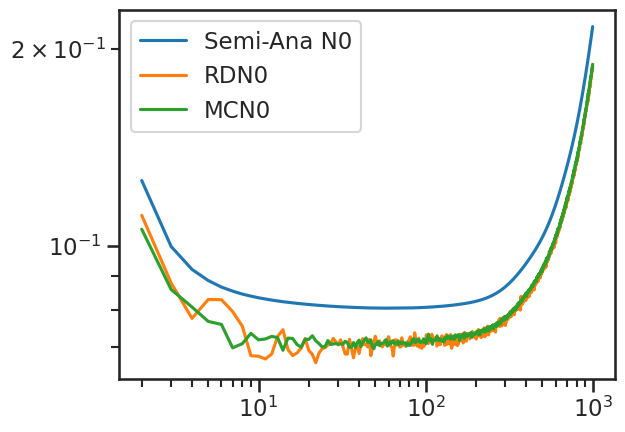

In [107]:
plt.loglog(ell, n0, label = 'Semi-Ana N0')
# plt.loglog(ell, n0_results, label = 'Semi-Ana N0 test')
plt.loglog(ell, rdn0, label = 'RDN0')

plt.loglog(ell, mcn0, label = 'MCN0')
# plt.ylim(1e-3, 1e1)
plt.legend()

In [22]:
# cases = ['no_fore', 'd9', 'forse3_Gaussiand9', 'forse3_d9']
cases = ['no_fore']
lmin_ivf = 100
lmax_ivf=2000
qe_keys = ['p_eb']
lmax_Bmode= 2000
experiment = 'S4_LAT'
results_no_fore = run_qe(qe_keys, cases, lmin_ivf = lmin_ivf, lmax_ivf = lmax_ivf, lmax_qlm = 1000, nsim = [200, 500], lmax_Bmode= lmax_Bmode, from_fg_res=False, experiment=experiment)

run for dir /pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_cinv/cleaned_cmb_no_fore_lmin_100_lmax_2000_p_eb_lmax_Bmode_2000


100%|██████████| 300/300 [00:27<00:00, 10.74it/s]


In [26]:
len(results_no_fore[2][0][0])

1001

In [27]:
len(results_no_fore[4][0][0])

1001

In [29]:
import copy
results_mcn0 = copy.deepcopy(results_no_fore)
results_mcn0[2][0][-1] = 2*ss
# results_test[1][0] = results_all_2000[1][0][0:10]

In [35]:
2*ss_N1 - 2*ss

array([ 0.00000000e+00,  4.86879697e+04, -7.56380079e+07, ...,
        5.14754956e+16,  4.82163635e+16,  1.14326507e+17])

In [30]:
results_rdn0 = copy.deepcopy(results_no_fore)
results_rdn0[2][0][-1] = (4*ds - 2*ss) # RDN0
results_rdn0[4][0][-1] = (2*ss_N1 - 2*ss) # MCN1

In [1]:
plot_errors_from_mf(cases, results_rdn0, lmax_Bmode, qe_key = qe_keys[0], experiment = experiment, subtract_mf= 'alm', from_fg_res = False, 
                                 plot_mf_cl=True, return_error=False, binning = ['toshiyan', binning, binner], true_binned=cl_binned)

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_cinv/


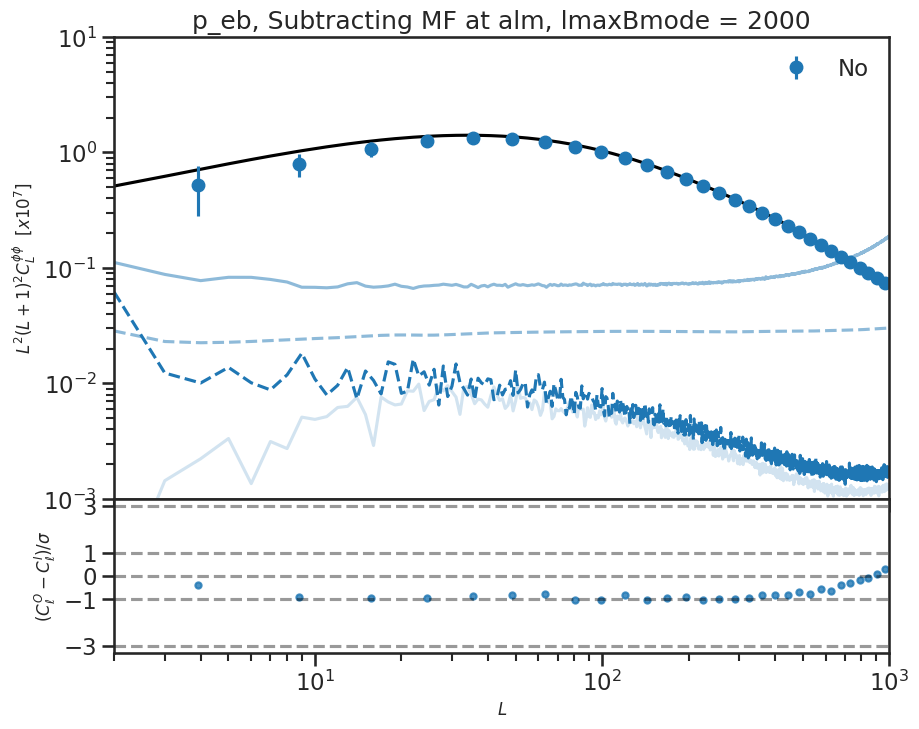

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_cinv/


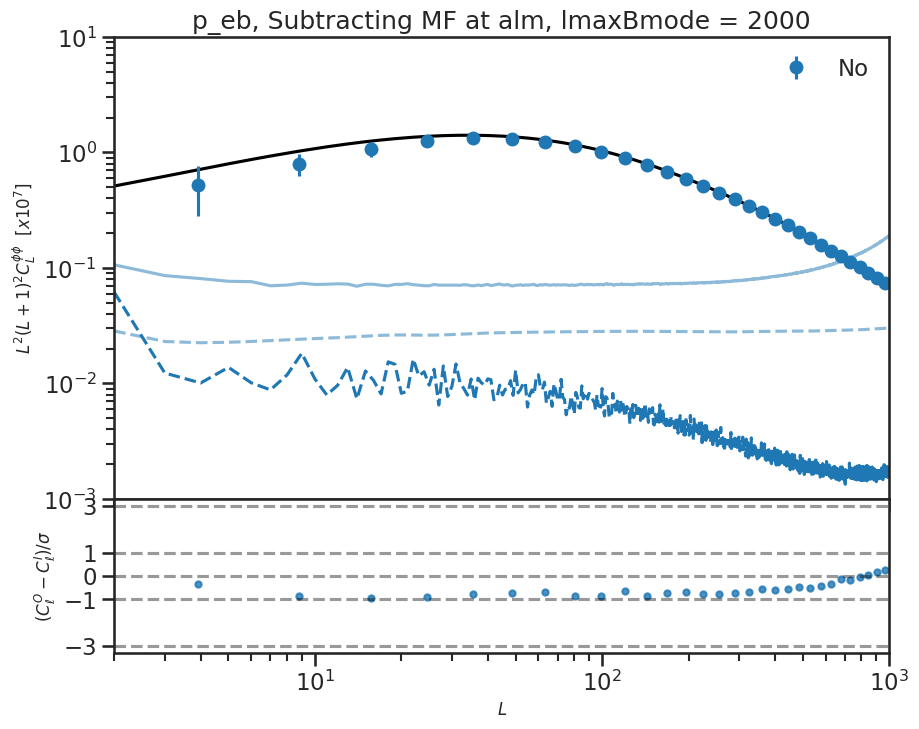

In [90]:
plot_errors_from_mf(cases, results_mcn0, lmax_Bmode, qe_key = qe_keys[0], experiment = experiment, subtract_mf= 'alm', from_fg_res = False, 
                                 plot_mf_cl=True, return_error=False, binning = ['toshiyan', binning, binner], true_binned=cl_binned)

## test for MC_mean_filed

$$Cl_{MF}^{MC} = (S + N0)/N$$

In [ ]:
import utility
reload(utility)
from utility import plot_errors_from_mf, w

plot from dir: /pscratch/sd/j/jianyao/data_lensing/lenre_results/S4_LAT_cinv/


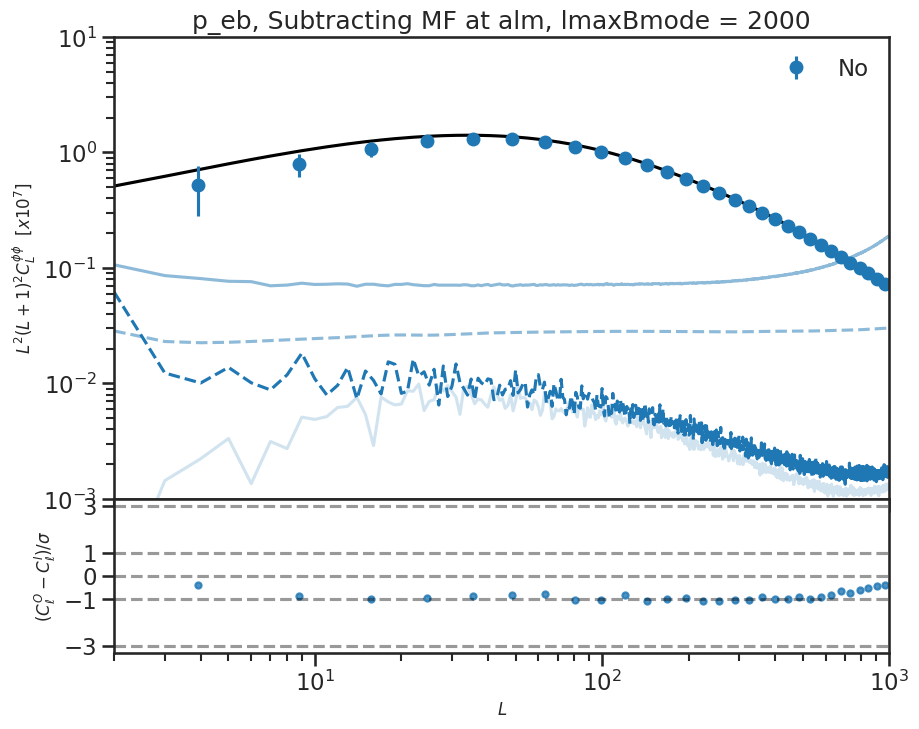

In [98]:
plot_errors_from_mf(cases, results_mcn0, lmax_Bmode, qe_key = qe_keys[0], experiment = experiment, subtract_mf= 'alm', from_fg_res = False, 
                                 plot_mf_cl=True, return_error=False, binning = ['toshiyan', binning, binner], true_binned=cl_binned)